In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import glob
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
import matplotlib.ticker as ticker


Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2.mplstyle, line 35 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_modern.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an

Welcome to JupyROOT 6.24/06


In [4]:
def cal_eff_purity_ownMC(file_name,file_list, tree, base_filter, N_gen):
    
    variables = ['Dp_isSignal','Dp_M','__experiment__', '__run__', '__event__']
    
    N_rec = 0

    # Initialize an empty dataframe to store concatenated results
    concatenated_df = pd.DataFrame()

    for file in file_list:
        recon_df = get_pd(file, tree, base_filter, variables)
        N_rec += len(recon_df)
        extracted_df = recon_df[["__experiment__", "__run__", "__event__"]].drop_duplicates()

        # Concatenate the extracted dataframe with the concatenated_df
        concatenated_df = pd.concat([concatenated_df, extracted_df], ignore_index=True)

    multiplicity = N_rec / len(concatenated_df) 

    eff = N_rec/N_gen
    
    recon_df = get_pd(file_name, tree, base_filter, variables)
    N_true = len(recon_df.query('Dp_isSignal==1'))
    purity = N_true/N_rec
    signal_eff = eff * purity
    
    signal_eff_error = math.sqrt(signal_eff * (1 - signal_eff) / N_gen)
    
    print(f"signal_eff={signal_eff:.4f}, signal_eff_error={signal_eff_error: .4f} ,eff={eff:.4f}, purity={purity:.4f}, multiplicity={multiplicity:.4f}, ")
    
    return (signal_eff, eff, purity, multiplicity)

# D+ -> (eta -> gg) pi+

In [10]:
# file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/240405_tight_v1_treefit_BCS_etapi0const/'
file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/240827_tight_v2_roe_Dptag/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter = "Dp_M>0 && num_Dstar>0"
variables = ['Dp_M','Dp_isSignal','Dp_chiProb','num_Dstar']
tree = 'etapip_gg'

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
std_dev_Dp_M_true = df2['Dp_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start = 1.6
x_end = 2.1

print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter = "Dp_M>0"
# base_filter+=' &&  Dp_M>' + str(x_start) + ' && Dp_M<' + str(x_end)
tree = 'etapip_gg'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> gg) pi+ eff:' + str(D0signal_eff))

runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "num_Dstar" is not in a dataset and is not a custom column been defined.

140209


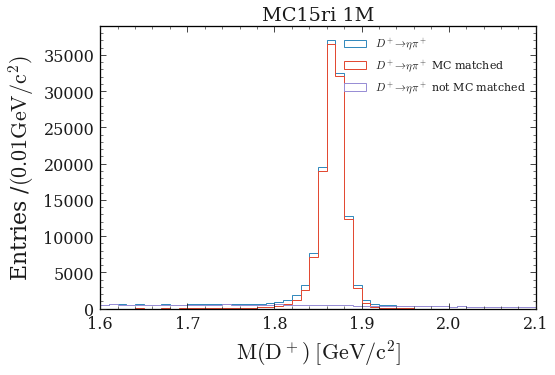

In [6]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v2_DpM.png"
# plt.savefig(file1_name)
print(len(df))

140209


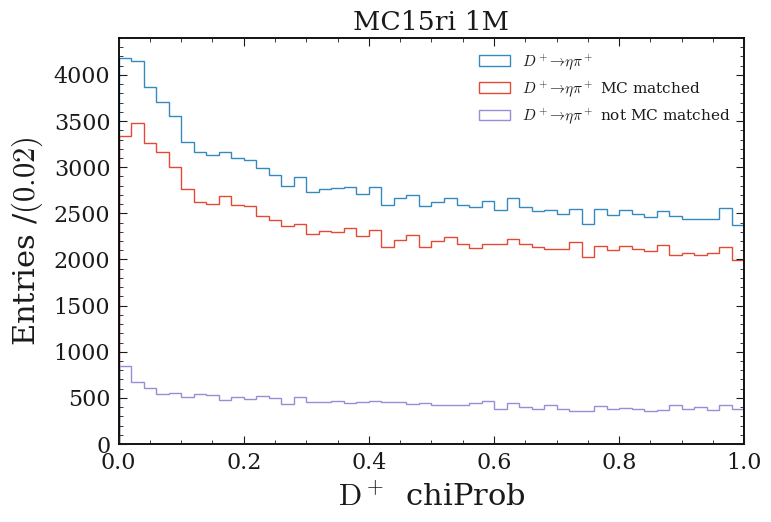

In [24]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v1_chiProb.png"
plt.savefig(file1_name)
print(len(df))

In [25]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/240405_tight_v1_treefit_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter = "etapip_gg_rank==1"
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']
tree = 'etapip_gg'

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
std_dev_Dp_M_true = df2['Dp_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start = 1.8697 - 4.5*std_dev_Dp_M_true
x_end = 1.8697 + 4*std_dev_Dp_M_true

print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter='etapip_gg_rank==1'
base_filter+=' &&  Dp_M>' + str(x_start) + ' && Dp_M<' + str(x_end)
tree = 'etapip_gg'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> gg) pi+ eff:' + str(D0signal_eff))

Standard deviation of column 'Dp_M': 0.019643813547561197
1.7813028390359746
1.9482752541902446
20
signal_eff=0.1122, signal_eff_error= 0.0003 ,eff=0.1181, purity=0.9503, multiplicity=1.0000, 
D+ -> (eta -> gg) pi+ eff:0.112242


118111


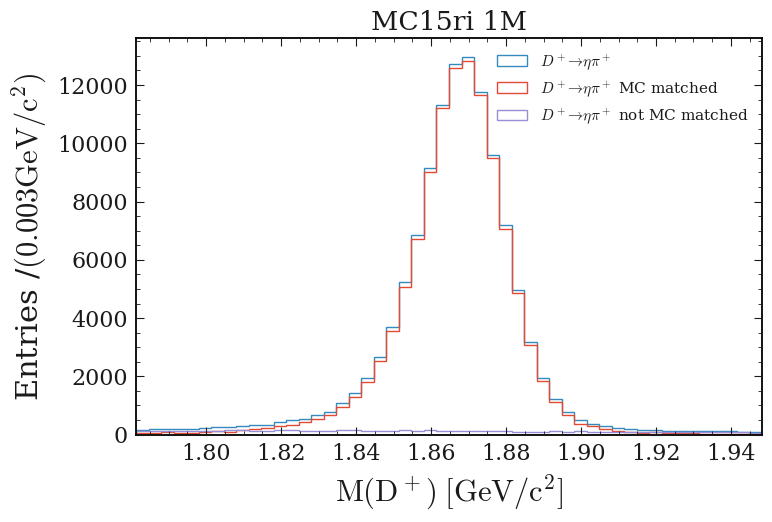

In [4]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v0_looseeta_BCS_DpM_BCS_SR.png"
# plt.savefig(file1_name)
print(len(df))

118111


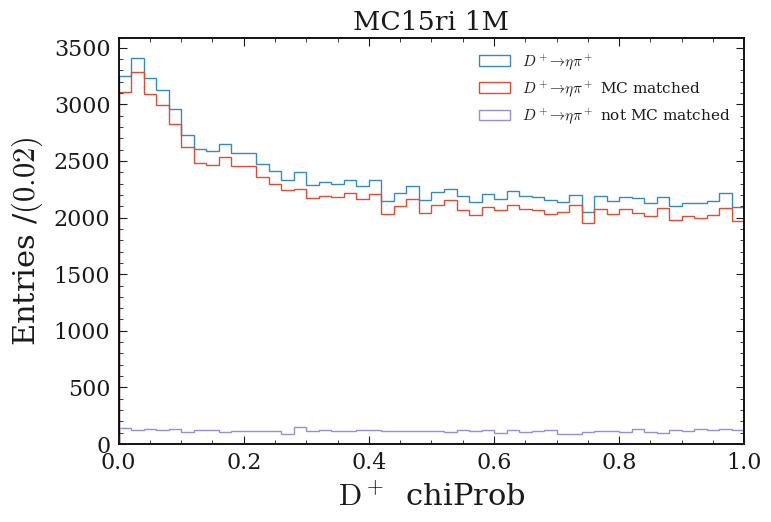

In [5]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v0_looseeta_BCS_chiProb_BCS_SR.png"
# plt.savefig(file1_name)
print(len(df))

In [6]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/240405_tight_v1_treefit_BCS_etaconst/'
file += '*.root'
base_filter = "etapip_gg_rank==1"
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']
tree = 'etapip_gg'

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
std_dev_Dp_M_true = df2['Dp_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start = 1.8697 - 4.5*std_dev_Dp_M_true
x_end = 1.8697 + 4*std_dev_Dp_M_true

print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter='etapip_gg_rank==1'
base_filter+=' &&  Dp_M>' + str(x_start) + ' && Dp_M<' + str(x_end)

tree = 'etapip_gg'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> gg) pi+ eff:' + str(D0signal_eff))



Standard deviation of column 'Dp_M': 0.019643813547561197
1.7813028390359746
1.9482752541902446
20
signal_eff=0.1122, signal_eff_error= 0.0003 ,eff=0.1181, purity=0.9503, multiplicity=1.0000, 
D+ -> (eta -> gg) pi+ eff:0.112242


118111


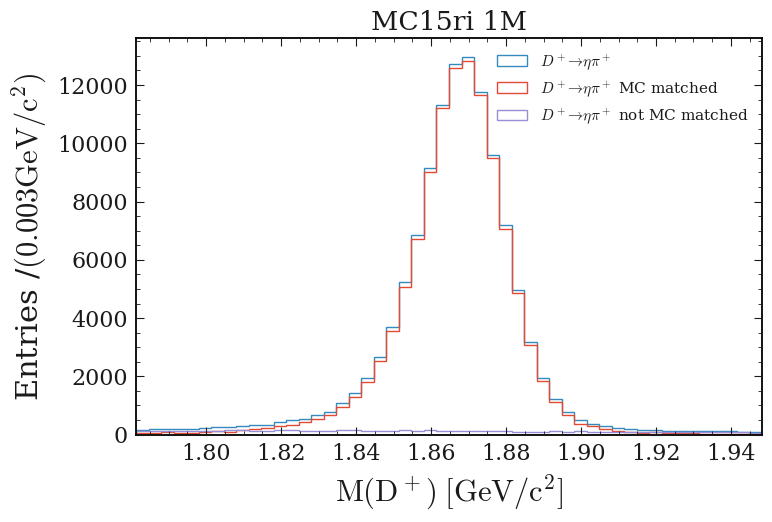

In [7]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v0_looseeta_etaconst_BCS_DpM_BCS_SR.png"
# plt.savefig(file1_name)
print(len(df))

131576


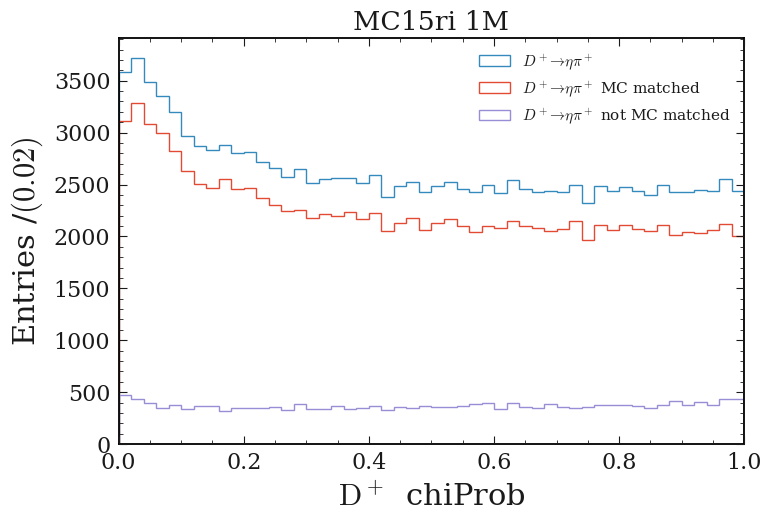

In [107]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v0_looseeta_etaconst_BCS_chiProb_BCS.png"
plt.savefig(file1_name)
print(len(df))

# D+ -> (eta -> pi+ pi- pi0) pi+

In [8]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/240405_tight_v1_treefit_BCS_etapi0const/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter = "etapip_pipipi_rank==1"
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']
tree = 'etapip_pipipi'

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
std_dev_Dp_M_true = df2['Dp_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start = 1.8697 - 4.5*std_dev_Dp_M_true
x_end = 1.8697 + 4*std_dev_Dp_M_true

print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter = "etapip_pipipi_rank==1"
base_filter+=' &&  Dp_M>' + str(x_start) + ' && Dp_M<' + str(x_end)
tree = 'etapip_pipipi'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> pi+ pi- pi0) pi+ eff:' + str(D0signal_eff))

Standard deviation of column 'Dp_M': 0.015528605803760474
1.7998212738830779
1.9318144232150418
20
signal_eff=0.0688, signal_eff_error= 0.0003 ,eff=0.0756, purity=0.9099, multiplicity=1.0000, 
D+ -> (eta -> pi+ pi- pi0) pi+ eff:0.06881899999999999


75635


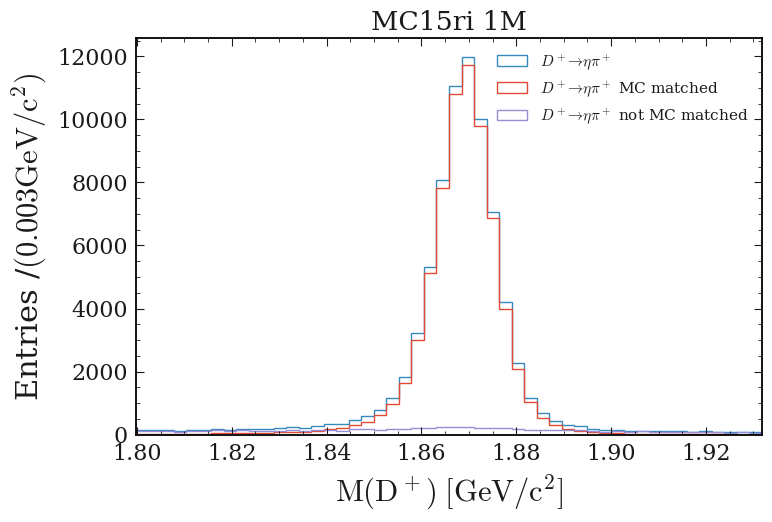

In [9]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v0_looseeta_BCS_DpM_BCS_SR.png"
# plt.savefig(file1_name)
print(len(df))

75635


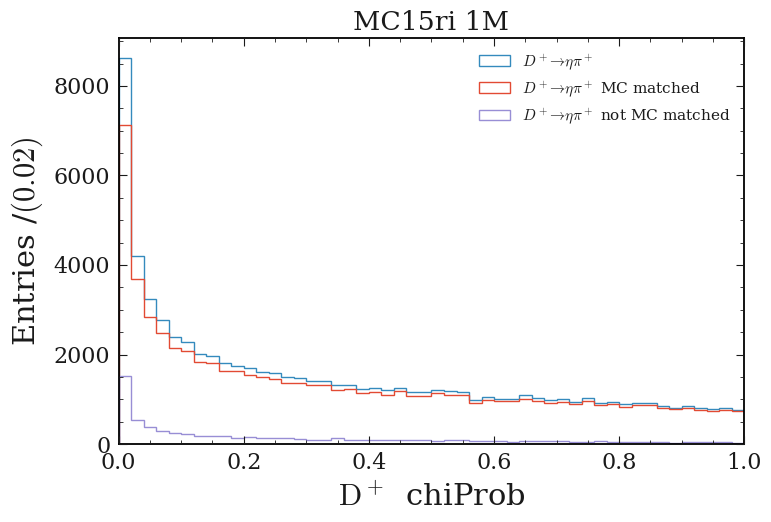

In [10]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v0_looseeta_BCS_chiProb_BCS.png"
# plt.savefig(file1_name)
print(len(df))

In [ ]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/240405_tight_v1_treefit_BCS_etaconst/'
file += '*.root'
base_filter = "etapip_pipipi_rank==1"
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']
tree = 'etapip_pipipi'

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
std_dev_Dp_M_true = df2['Dp_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M_true)

x_start = 1.8697 - 4.5*std_dev_Dp_M_true
x_end = 1.8697 + 4*std_dev_Dp_M_true

print(x_start)
print(x_end)


# base_filter=' Dp_M>0'
base_filter = "etapip_pipipi_rank==1"
base_filter+=' &&  Dp_M>' + str(x_start) + ' && Dp_M<' + str(x_end)

tree = 'etapip_pipipi'
root_files = glob.glob(file)
print(len(root_files))
D0signal_eff,D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 1e+6)
print('D+ -> (eta -> pi+ pi- pi0) pi+ eff:' + str(D0signal_eff))

Standard deviation of column 'Dp_M': 0.016053556073640615
1.797458997668617
1.9339142242945624
20
signal_eff=0.0729, signal_eff_error= 0.0003 ,eff=0.0928, purity=0.7861, multiplicity=1.1267, 
D+ -> (eta -> pi+ pi- pi0) pi+ eff:0.072917


79639


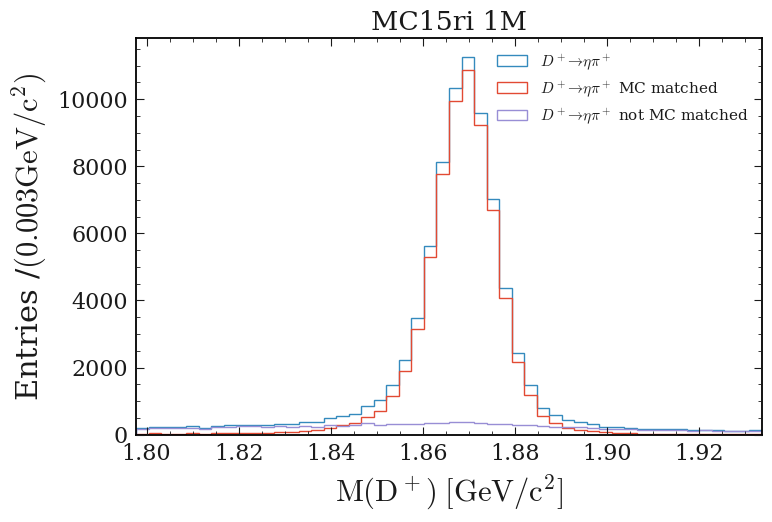

In [13]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb']

df = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df.query('Dp_isSignal==1')
df3 = df.query('Dp_isSignal!=1')

fig = plt.figure()
ax = fig.subplots()
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v0_looseeta_BCS_etaconst_DpM_SR.png"
# plt.savefig(file1_name)
print(len(df))

79639


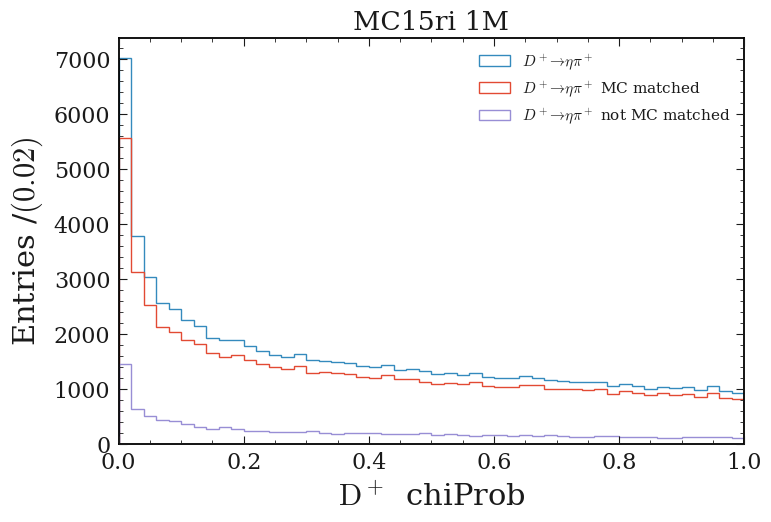

In [14]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,1,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_chiProb"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=11)
ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{D^+} \;$ chiProb")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi/MC15ri_3pi_tight_v0_looseeta_BCS_etaconst_chiProb.png"
# plt.savefig(file1_name)
print(len(df))